In [2]:
import sys
sys.path.append('/core/github/cryptoderiv-quant/')
from ct.utils import glassnode

from cdcqr.data.glassnode.utils import get_glassnode_data, quantile_info, url_parser
from datetime import datetime as dt
from datetime import timedelta
from cdcqr.common.config import GLASSNODE_API_KEY as API_KEY
from cdcqr.common.utils import load_df, save, resample_pv
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from cdcqr.ct.utils import plot2

logging to C:\core\logs\ct.log


In [3]:
from cdcqr.data.glassnode.utils import glassnode1

In [4]:

res = requests.get('https://api.glassnode.com/v1/metrics/market/price_usd_close',
    params={'a': 'BTC', 'i':'1h','api_key': API_KEY})

# convert to pandas dataframe
df_btc = pd.read_json(res.text, convert_dates=['t'])

In [5]:
df_btc.head(2)

,t,v
0,2010-07-17 23:00:00,0.04951
1,2010-07-18 00:00:00,NaN


In [ ]:
futures_open_interest_perpetual_sum_all BTC derivatives 1h

In [ ]:
res = requests.get('https://api.glassnode.com/v1/metrics/derivatives/futures_open_interest_perpetual_sum_all',
    params={'a': 'BTC',  'i':'1h','api_key': API_KEY})

# convert to pandas dataframe
dff = pd.read_json(res.text, convert_dates=['t'])

In [62]:
dff['oi'] = dff['o'].apply(lambda x: x['total'])

In [ ]:
df_dict['BTC']

In [66]:
df1 = pd.merge(left = dff[['t','oi']], right = df_btc, on = ['t']).set_index('t')

In [67]:
df1.columns = ['oi','BTC']
df1.head(2)

,oi,BTC
t,,
2020-02-21 15:00:00,26112.69194,9717.201257
2020-02-21 16:00:00,170023.497,9702.776769


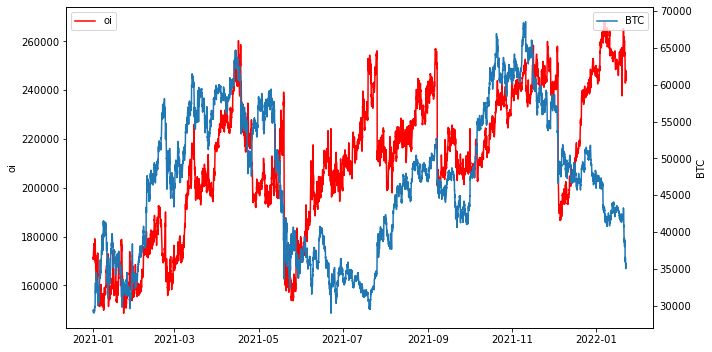

In [72]:
df1[df1.index>'20210101'].plot2('oi','BTC')

In [69]:
df1['Sum(returns(oi,1),7)'] = df1['oi'].pct_change().rolling(7).sum()
df1['Sum(returns(oi,1),7)/BTC'] = df1['Sum(returns(oi,1),7)']/df1['BTC']


In [ ]:
df1.plot2('Sum(returns(oi,1),7)','BTC')

In [2]:
from cdcqr.common.config import LOCAL_FIGURE_DIR
LOCAL_FIGURE_DIR

'C:\\core\\figure'